In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv(R'customer.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
cat=['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
num=['SeniorCitizen','tenure','MonthlyCharges']


In [7]:
#Fetching column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Checking statistical analysis
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values

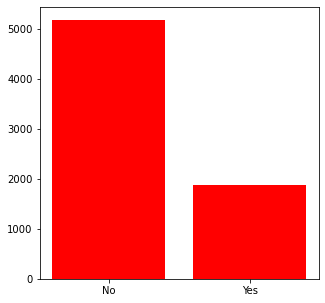

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['Churn'].value_counts()),color = 'r')
plt.show()
df['Churn'].value_counts()

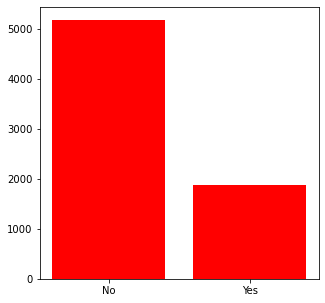

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['Churn'].value_counts()),color = 'r')
plt.show()
df['Churn'].value_counts()

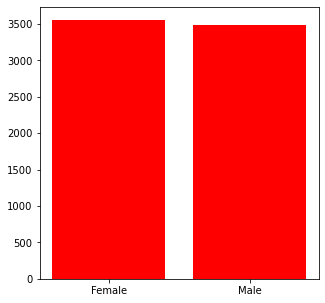

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
plt.figure(figsize=(5,5))
plt.bar(['Female','Male'],list(df['gender'].value_counts()),color = 'r')
plt.show()
df['Churn'].value_counts()

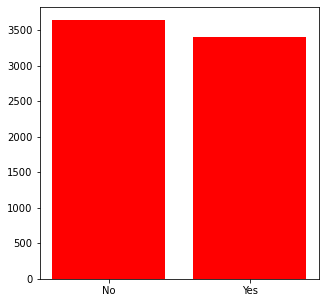

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['Partner'].value_counts()),color = 'r')
plt.show()
df['Churn'].value_counts()

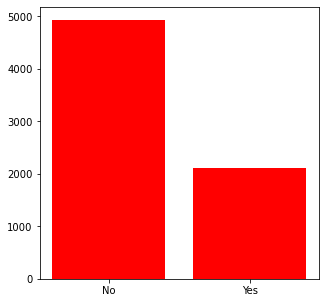

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [15]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['Dependents'].value_counts()),color = 'r')
plt.show()
df['Dependents'].value_counts()

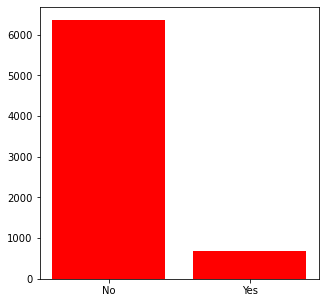

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [16]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['PhoneService'].value_counts()),color = 'r')
plt.show()
df['PhoneService'].value_counts()

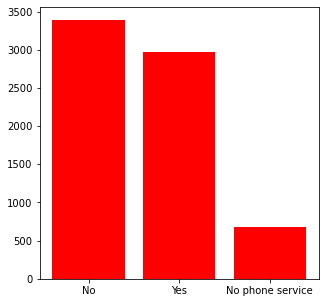

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No phone service'],list(df['MultipleLines'].value_counts()),color = 'r')
plt.show()
df['MultipleLines'].value_counts()

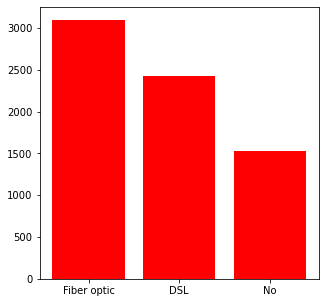

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [18]:
plt.figure(figsize=(5,5))
plt.bar(['Fiber optic','DSL','No'],list(df['InternetService'].value_counts()),color = 'r')
plt.show()
df['InternetService'].value_counts()

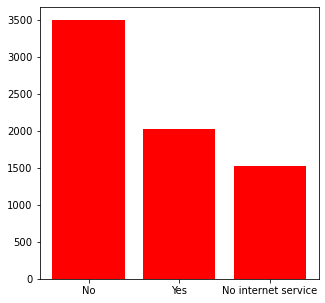

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [19]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['OnlineSecurity'].value_counts()),color = 'r')
plt.show()
df['OnlineSecurity'].value_counts()

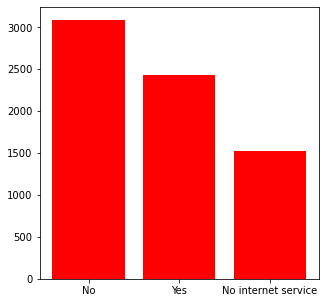

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [20]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['OnlineBackup'].value_counts()),color = 'r')
plt.show()
df['OnlineBackup'].value_counts()

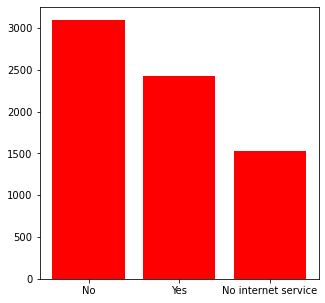

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [21]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['DeviceProtection'].value_counts()),color = 'r')
plt.show()
df['DeviceProtection'].value_counts()

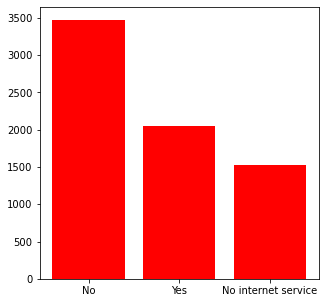

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [22]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['TechSupport'].value_counts()),color = 'r')
plt.show()
df['TechSupport'].value_counts()

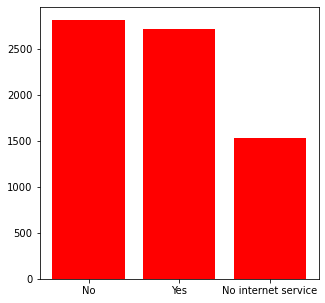

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [23]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['StreamingTV'].value_counts()),color = 'r')
plt.show()
df['StreamingTV'].value_counts()

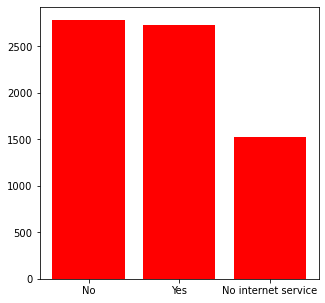

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [24]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes','No internet service'],list(df['StreamingMovies'].value_counts()),color = 'r')
plt.show()
df['StreamingMovies'].value_counts()

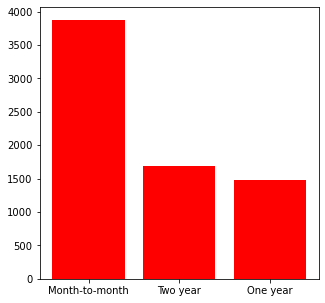

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [25]:
plt.figure(figsize=(5,5))
plt.bar(['Month-to-month','Two year','One year'],list(df['Contract'].value_counts()),color = 'r')
plt.show()
df['Contract'].value_counts()

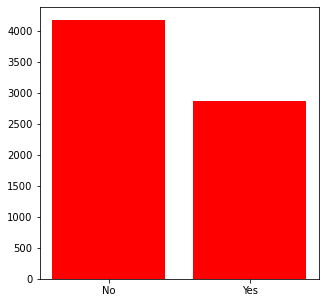

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [26]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['PaperlessBilling'].value_counts()),color = 'r')
plt.show()
df['PaperlessBilling'].value_counts()

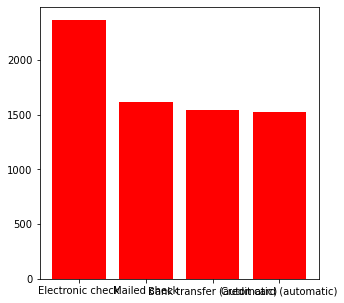

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [27]:
plt.figure(figsize=(5,5))
plt.bar(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],list(df['PaymentMethod'].value_counts()),color = 'r')
plt.show()
df['PaymentMethod'].value_counts()

In [28]:
#Converting type column (as it is a object type ) into float type column
from sklearn.preprocessing import OrdinalEncoder
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df['TotalCharges'].fillna(int(df['TotalCharges'].mean()), inplace=True)
df['TotalCharges'].astype(int)
enc = OrdinalEncoder()
df['customerID'] = enc.fit_transform(df['customerID'].values.reshape(-1,1))
df['gender'] = enc.fit_transform(df['gender'].values.reshape(-1,1))
df['Partner'] = enc.fit_transform(df['Partner'].values.reshape(-1,1))
df['Dependents'] = enc.fit_transform(df['Dependents'].values.reshape(-1,1))
df['PhoneService'] = enc.fit_transform(df['PhoneService'].values.reshape(-1,1))
df['MultipleLines'] = enc.fit_transform(df['MultipleLines'].values.reshape(-1,1))
df['InternetService'] = enc.fit_transform(df['InternetService'].values.reshape(-1,1))
df['OnlineSecurity'] = enc.fit_transform(df['OnlineSecurity'].values.reshape(-1,1))
df['OnlineBackup'] = enc.fit_transform(df['OnlineBackup'].values.reshape(-1,1))
df['DeviceProtection'] = enc.fit_transform(df['DeviceProtection'].values.reshape(-1,1))
df['TechSupport'] = enc.fit_transform(df['TechSupport'].values.reshape(-1,1))
df['StreamingTV'] = enc.fit_transform(df['StreamingTV'].values.reshape(-1,1))
df['StreamingMovies'] = enc.fit_transform(df['StreamingMovies'].values.reshape(-1,1))
df['Contract'] = enc.fit_transform(df['Contract'].values.reshape(-1,1))
df['PaperlessBilling'] = enc.fit_transform(df['PaperlessBilling'].values.reshape(-1,1))
df['PaymentMethod'] = enc.fit_transform(df['PaymentMethod'].values.reshape(-1,1))
df['TotalCharges'] = enc.fit_transform(df['TotalCharges'].values.reshape(-1,1))
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])


In [30]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.056964
Churn               1.063031
dtype: float64

Skewness is very high in columns: SeniorCitizen,PhoneService, Churn(target column). So we need to remove skewness from SeniorCitizen,PhoneService columns using log method

In [31]:
#Checking correlation
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.231128
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

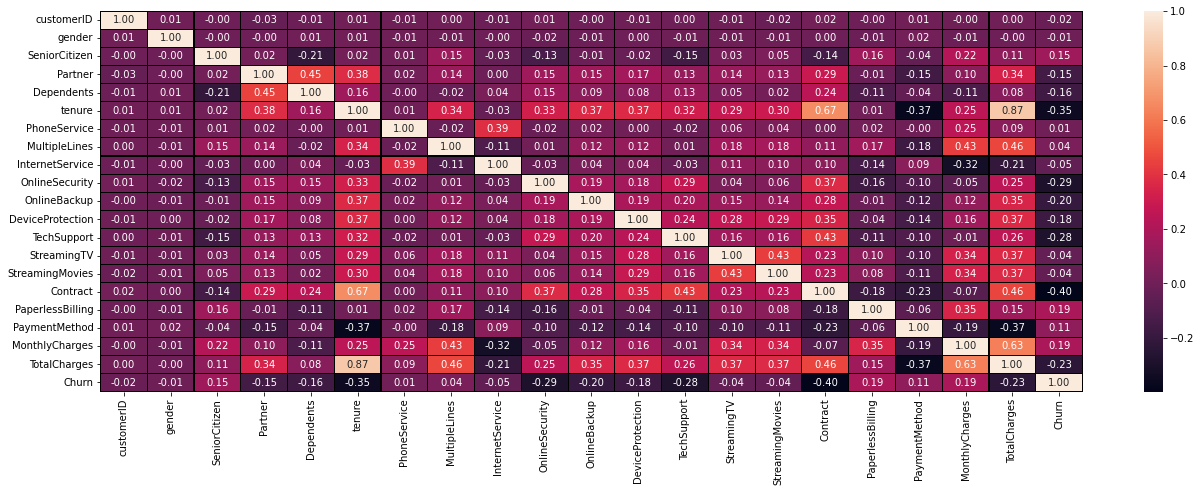

In [32]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

customerID             AxesSubplot(0.125,0.657941;0.0945122x0.222059)
gender              AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
MultipleLines          AxesSubplot(0.125,0.391471;0.0945122x0.222059)
InternetService     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
StreamingMovies     

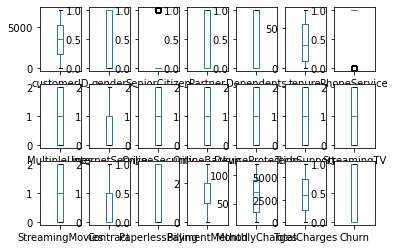

In [33]:
#Plotting boxplot to check outliers

df_new =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df_new.plot(kind='box',subplots=True,layout=(3,7))

In [34]:
#Dividing data into x and y i.e input and target
x=df.iloc[:,0:-1]# independent variables
y=df.iloc[:,-1]#target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
298,2079.0,1.0,0,1.0,1.0,40,1.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,74.55,4359.0
3318,3535.0,1.0,0,0.0,0.0,10,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,29.50,1016.0
5586,1341.0,0.0,0,0.0,0.0,27,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,19.15,1607.0
6654,1293.0,0.0,0,1.0,0.0,7,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,86.50,1767.0
5362,326.0,1.0,0,1.0,1.0,65,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,24.75,3430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,468.0,1.0,0,1.0,0.0,1,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,95.00,486.0
5191,4242.0,0.0,0,1.0,1.0,23,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,91.10,3848.0
5226,5711.0,1.0,0,1.0,1.0,12,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,21.15,1156.0
5390,5281.0,1.0,1,0.0,0.0,12,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.45,2762.0


In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [38]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_test, y_test)


0.7772043010752688

In [39]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.7965591397849462

In [40]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7294623655913979

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


gbr.score(X_test, y_test)

0.8086021505376344

In [42]:
#Ridge
from sklearn.linear_model import Ridge
ridgeMod = Ridge(alpha=0.01, normalize=True)
ridgeMod.fit(X_train, y_train)
ridgeMod.fit(X_test, y_test)
ridge_model_pred = ridgeMod.predict(X_test)
ridgeMod.score(X_test, y_test)

0.32993776969341915

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.fit(X_test, y_test)
logreg_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)


/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8012903225806451

In [44]:
svc = SVC()
svc.fit(X_train, y_train)
svc.fit(X_test, y_test)
svc_pred = svc.predict(X_test)
svc.score(X_test, y_test)

0.7298924731182795

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.fit(X_test, y_test)
gaussian_pred = gaussian.predict(X_test)
gaussian.score(X_test, y_test)

0.7634408602150538

In [46]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(gbr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)

In [47]:
conclusion =pd.DataFrame([loaded_model.predict(X_test)[:],y_test_pred[:]],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
Predicted,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
Original,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
